#  Advance Regression Assignment 

Building a regression model using Advance regression techniques like Ridge and Lasso regression to predict the price of houses using the input variables. This will help the management to understand how the price varies with the input variables. Additionally, the model will be a good way for management to understand the pricing dynamics of the new market. 

### Methodology   :
1. Data Understanding: Understanding the data: shape, data types and statistical info
2. Data Preparation : Missing value treatment and outlier analysis
3. Data Exploration : EDA Univariate and Bivariate analysis
4. Data Preprocessin: Transforming output variable,label encoding and creation of dummies
5. Data Modelling : Train test split,Feature scaling,RFE ,Ridge and Lasso regression
6. Conclusion : Recommending the top 10 predictor variables
  

In [424]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import os
#To handle warnings 
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn import metrics
from scipy import stats
from scipy.stats import norm, skew 

pd.set_option('display.max_rows', 500)

 ## 1. Data Understanding

In [425]:
#Get the current working directory 
cwd = os.getcwd()
print(cwd)
# Place the downloaded train.csv in your current working directory
filepath=cwd+'/train.csv'

/Users/poojaravishankar/Documents/Advance_Regression


In [426]:
#Read the data set
df_housing_ = pd.read_csv(filepath,low_memory=False)
df_housing_.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [427]:
# Display no of rows and columns in the data set
df_housing_.shape

(1460, 81)

In [428]:
#Columns with its data types displayed
df_housing_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [429]:
#Display the list columns in the data set
df_housing_.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [430]:
#Statistical info of the data frame
df_housing_.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [431]:
# Checking for null values present 
df_housing_.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

 ## 2. Data Preparation 

In [432]:
#Checking the number of missing values and calculating its percentage
Missingvalues_total = df_housing_.isnull().sum().sort_values(ascending = False)
Missingvalues_Perc = (100*df_housing_.isnull().sum()/df_housing_.shape[0]).sort_values(ascending = False)


In [433]:
df_total_missingvalues = pd.concat([Missingvalues_total,Missingvalues_Perc], axis=1, keys=['Missingvalues_total','Missingvalues_Perc'])
df_total_missingvalues.head(60)

,Missingvalues_total,Missingvalues_Perc
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [434]:
# Display the number of columns having more than 45% of missing data

print('Total no of columns with missing values more than 45% : {}'.format(df_total_missingvalues[df_total_missingvalues['Missingvalues_Perc'] >= 45].shape[0]))

Total no of columns with missing values more than 45% : 5


In [435]:
#We are dropping these 5 columns which have more than 45% of the missing data.

df_modified = df_housing_.loc[:,(100*df_housing_.isnull().sum()/df_housing_.shape[0]).sort_values(ascending = False) < 45]


In [436]:
df_modified.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [437]:
#Check the number of unique values present in each column
df_modified.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea 

In [438]:
# Fetch the value counts of all the columns
for col in df_modified:
    print(df_modified[col].astype('category').value_counts())
    print('***************************************************')

1460    1
479     1
481     1
482     1
483     1
       ..
976     1
977     1
978     1
979     1
1       1
Name: Id, Length: 1460, dtype: int64
***************************************************
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
***************************************************
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
***************************************************
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
79.0      17
72.0      17
63.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
40.0      12
57.0      12
67.0      12
43.0      12
71.0      12
76

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64
***************************************************
0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64
***************************************************
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
***************************************************
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
1958.0    21
2009.0    21
1965.0    21
1966.0    21
1962.0    21
1957.0    20
1970.0    20
1996.0    20
2001.0    20
1978.0    19
1954.0    19
1997.0    19
1960.0    19
1994.0    18
1964.0    18
1995.0    18
1974.0    18
1959.0    17
1990.0    16
1956.0    16
1963.0    16
1967.0    15
1979.0    15
1980.0    15
1969.0    15
1920.0    14
1

#### Imputing Data for columns with categorical values 

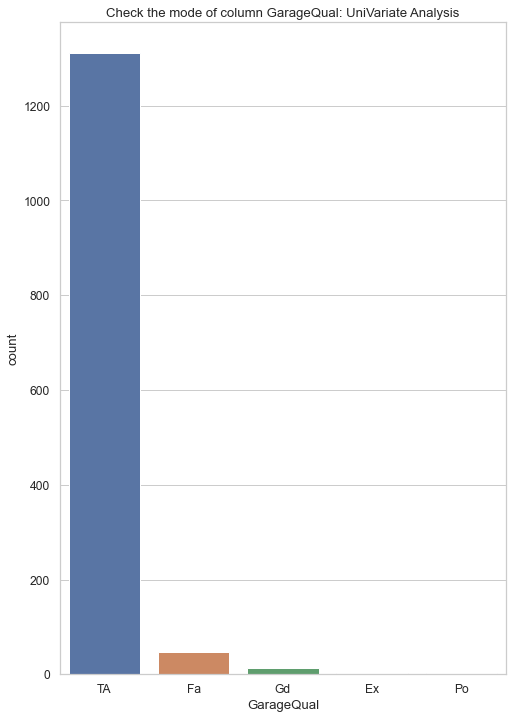

In [439]:
# Imputating data : mode for column 'GarageQual'
plt.figure(figsize=(8,12))
sns.countplot(df_modified.GarageQual)
plt.title("Check the mode of column GarageQual: UniVariate Analysis")
plt.show()

In [440]:
df_modified.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [441]:
# Mojority of the values are TA, so we can map the NAN values to mode of TA
df_modified['GarageQual'] = df_modified['GarageQual'].replace(np.nan,'TA')
df_modified['GarageQual'].dtype

dtype('O')

In [442]:
df_modified.GarageQual.value_counts()

TA    1392
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

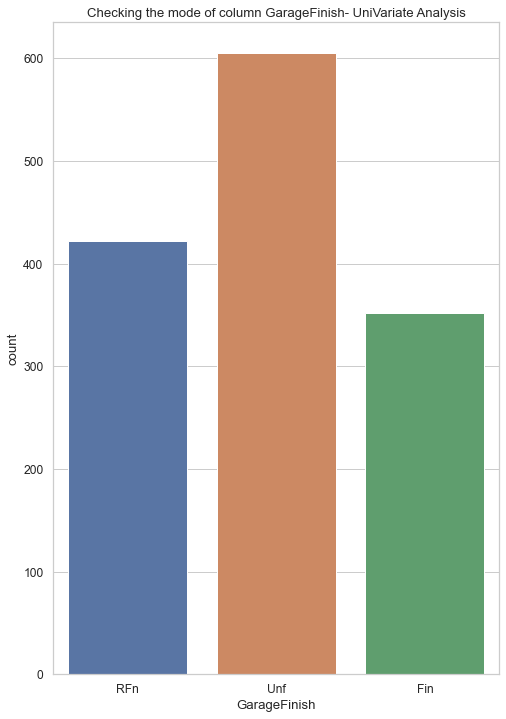

In [443]:
# Imputating data : mode for column 'GarageFinish'
plt.figure(figsize=(8,12))
sns.countplot(df_modified.GarageFinish)
plt.title("Checking the mode of column GarageFinish- UniVariate Analysis")
plt.show()

In [444]:
df_modified.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [445]:
df_modified['GarageFinish']=df_modified['GarageFinish'].replace(np.nan,'Unknown')
df_modified.GarageFinish.value_counts()

Unf        605
RFn        422
Fin        352
Unknown     81
Name: GarageFinish, dtype: int64

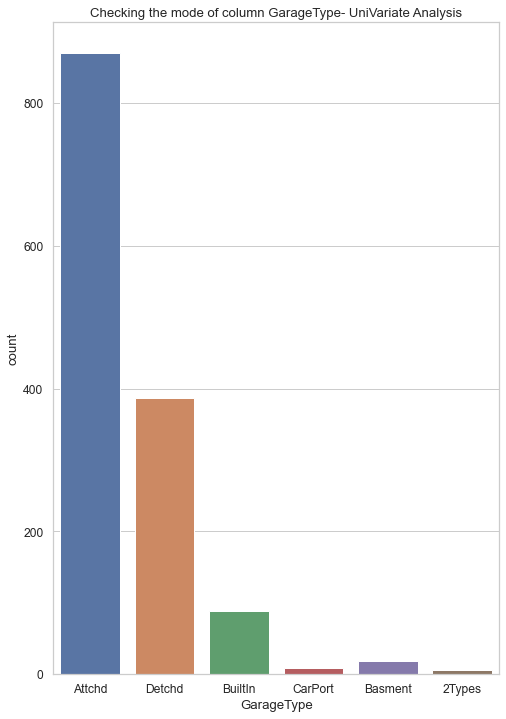

In [446]:
# Data imputation for column 'GarageType'

plt.figure(figsize=(8,12))
sns.countplot(df_modified.GarageType)
plt.title("Checking the mode of column GarageType- UniVariate Analysis")
plt.show()

In [447]:
df_modified.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [448]:
# Imputing Nan values with the mode of Attchd 
df_modified['GarageType'] = df_modified['GarageType'].replace(np.nan,'Attchd')
df_modified.GarageType.value_counts()

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

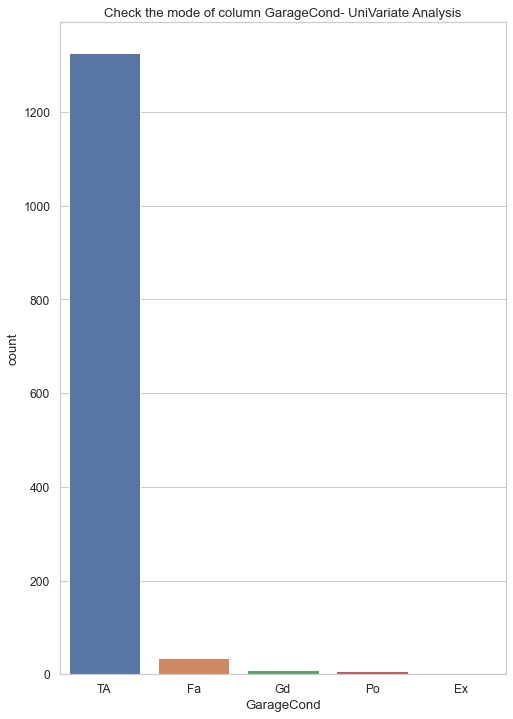

In [449]:
# Data imputation for column 'GarageCond'

plt.figure(figsize=(8,12))
sns.countplot(df_modified.GarageCond)
plt.title("Check the mode of column GarageCond- UniVariate Analysis")
plt.show()

In [450]:
df_modified.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [451]:
# Imputing Nan values with the mode of TA 
df_modified['GarageCond'] = df_modified['GarageCond'].replace(np.nan,'TA')
df_modified.GarageCond.value_counts()

TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

#### Imputing Data for Numerical columns 

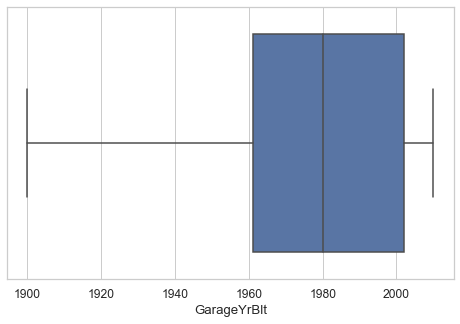

In [452]:
#Plotting to do the outlier analysis of GarageYrBlt
sns.boxplot(df_modified.GarageYrBlt)
plt.show()

In [453]:
#There are no outiers hence imputing missing values with mean
df_modified['GarageYrBlt'].fillna(df_modified['GarageYrBlt'].mean(),inplace=True)

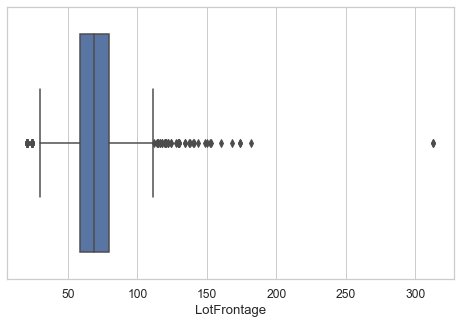

In [454]:
#Plotting for outlier analysis for LotFrontage
sns.boxplot(df_modified.LotFrontage)
plt.show()

In [455]:
#Imputing with median as there are outliers
df_modified['LotFrontage'].fillna(df_modified['LotFrontage'].median(),inplace=True)
#The remaining columns have less than 3% of Nan Values we chose to drop those rows .
df_modified.dropna(inplace=True)

In [456]:
#Checking the number of missing values and calculating its percentage
Missingvalues_total = df_modified.isnull().sum().sort_values(ascending = False)
Missingvalues_Perc = (100*df_modified.isnull().sum()/df_modified.shape[0]).sort_values(ascending = False)

In [457]:
df_total_missingvalues = pd.concat([Missingvalues_total,Missingvalues_Perc], axis=1, keys=['Missingvalues_total','Missingvalues_Perc'])
df_total_missingvalues

,Missingvalues_total,Missingvalues_Perc
SalePrice,0,0.0
ExterCond,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
Foundation,0,0.0


All the missing values has been handled

## 3. Data Exploration : EDA

In [458]:
df_modified.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [459]:
#Derive a new column Age of building and drop other columns. 
#Take the remodel date because it would not be right to take original date of built
df_modified['Age']=df_modified['YrSold']-df_modified['YearRemodAdd'] 
df_modified['Age'].head()

0     5
1    31
2     6
3    36
4     8
Name: Age, dtype: int64

In [460]:
df_modified=df_modified.drop(['YrSold', 'MoSold','YearBuilt','YearRemodAdd'], axis = 1) 
df_modified.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,WD,Normal,223500,6
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,WD,Abnorml,140000,36
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,WD,Normal,250000,8


In [461]:
#Drop the id ,it does not give any relevant info
df_modified=df_modified.drop(['Id'], axis = 1) 

In [462]:
#Numerical columns of our data set
numeric_features = df_modified.dtypes[df_modified.dtypes != "object"].index
numeric_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'Age'],
      dtype='object')

### Univariate analysis of the numerical columns

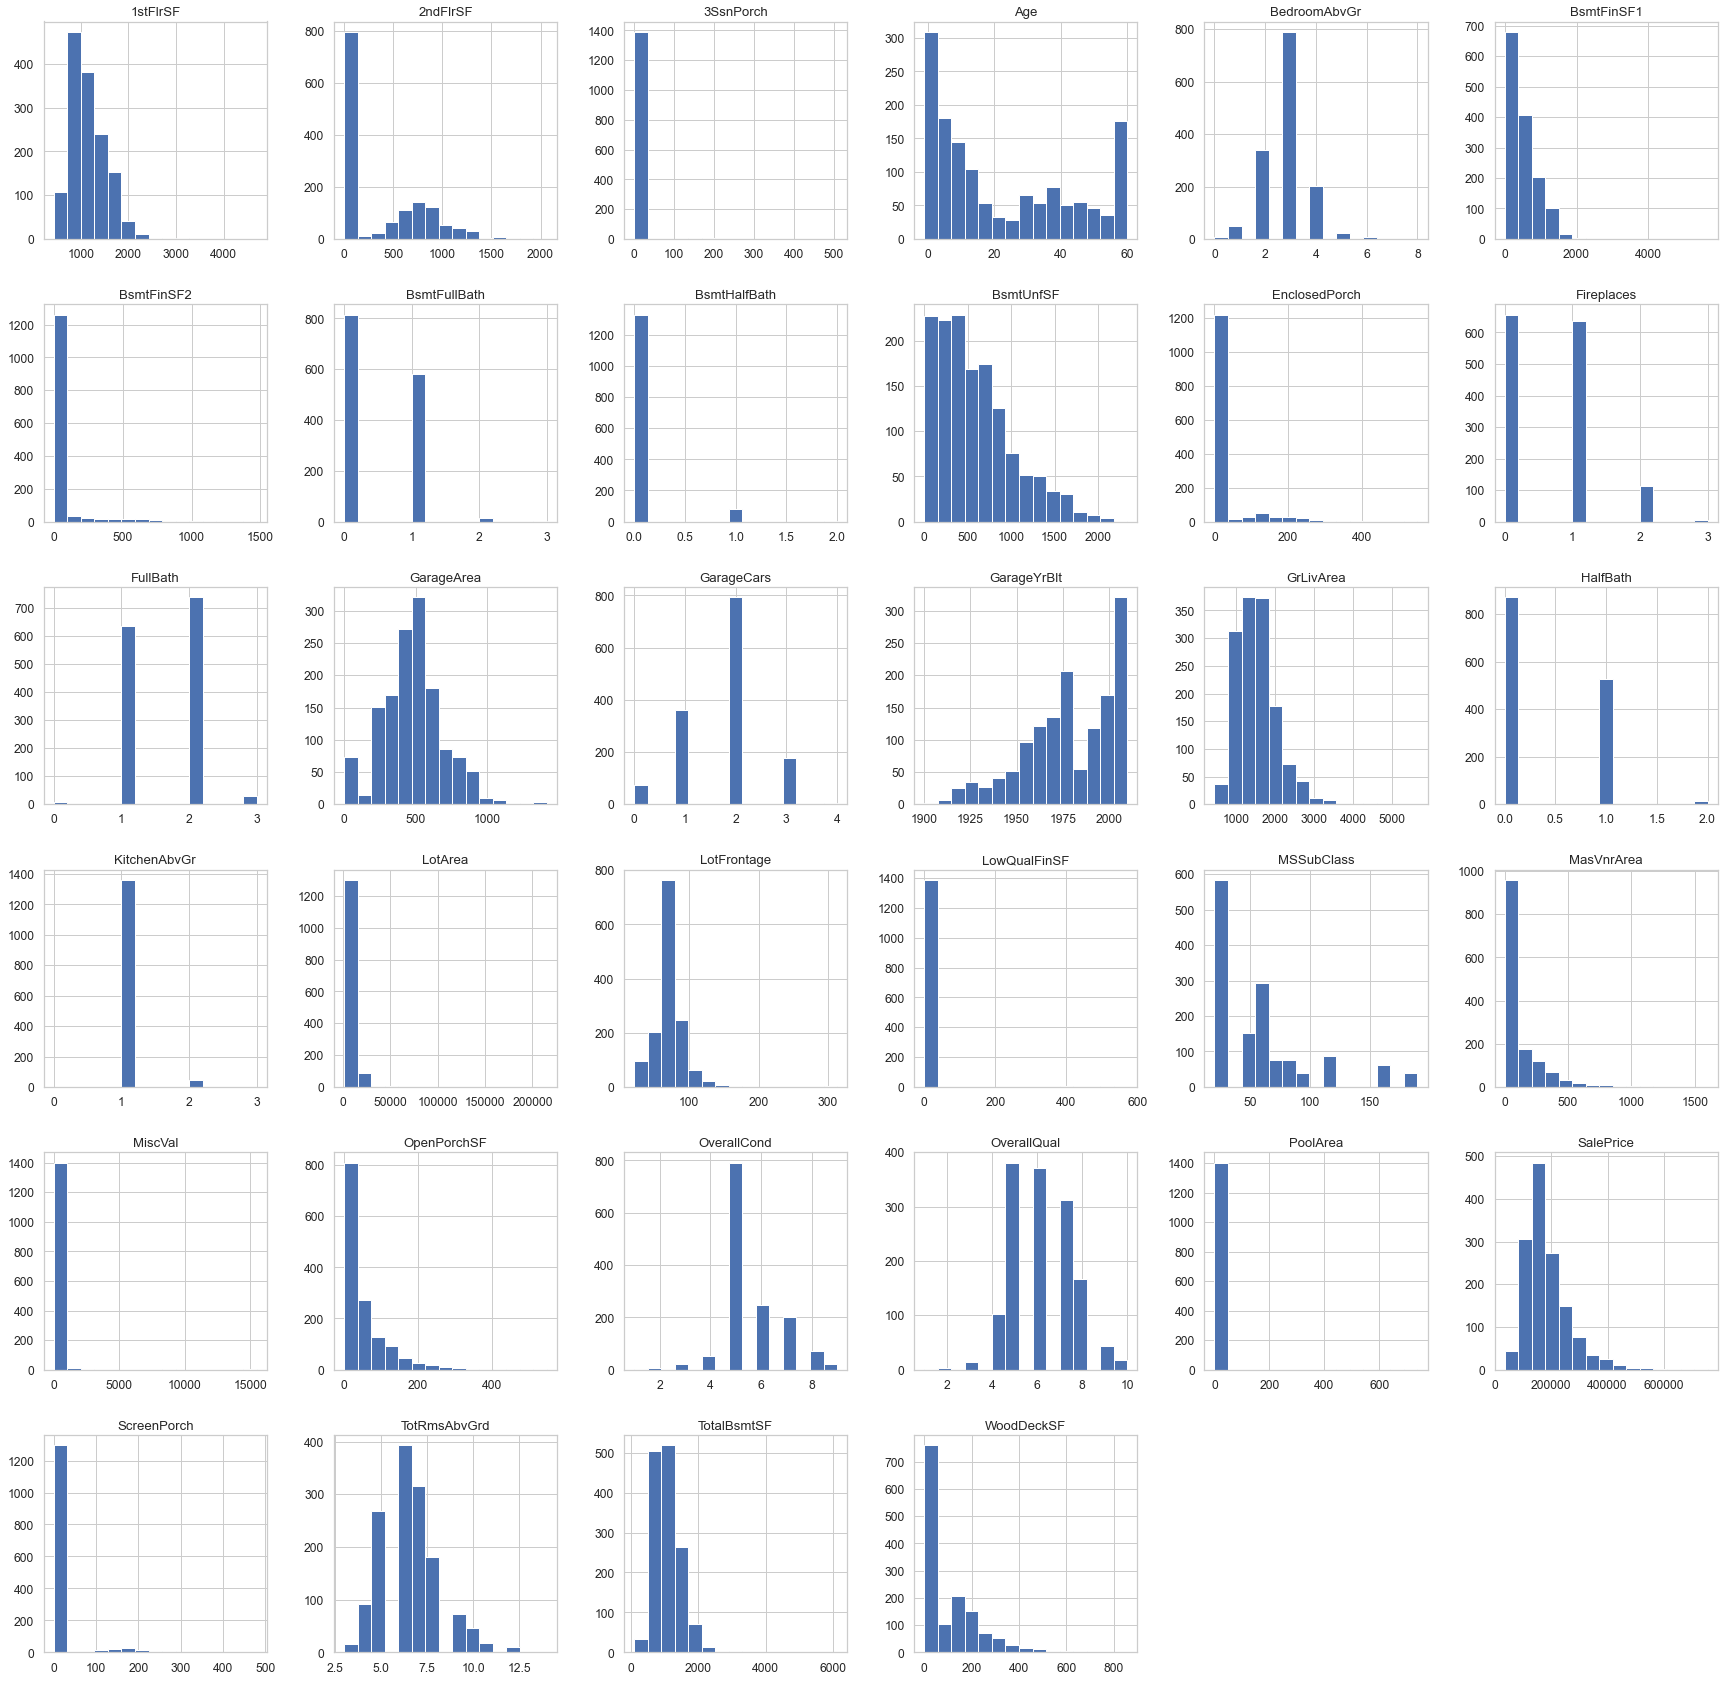

In [463]:
df_modified[numeric_features].hist(bins=15, figsize=(30, 30))
plt.show()

In [464]:
# correlation matrix
cor = df_modified.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age
MSSubClass,1.000000,-0.359784,-0.138298,0.038952,-0.063240,0.023024,-0.067783,-0.064875,-0.139572,-0.253332,...,-0.094523,-0.014568,-0.005684,-0.016768,-0.041226,-0.026202,0.008496,-0.022705,-0.082281,-0.045620
LotFrontage,-0.359784,1.000000,0.303055,0.232893,-0.055121,0.179106,0.214046,0.040468,0.118356,0.385093,...,0.324805,0.073858,0.133934,0.012227,0.064597,0.036986,0.181510,-0.000569,0.333348,-0.078883
LotArea,-0.138298,0.303055,1.000000,0.104763,-0.002941,0.104010,0.213450,0.111381,-0.008757,0.275637,...,0.180207,0.172281,0.083860,-0.022978,0.021153,0.042818,0.077814,0.041567,0.264803,-0.011599
OverallQual,0.038952,0.232893,0.104763,1.000000,-0.121155,0.409656,0.211652,-0.072897,0.278239,0.509473,...,0.561612,0.230274,0.297678,-0.122678,0.032014,0.059290,0.065474,-0.025344,0.786765,-0.541616
OverallCond,-0.063240,-0.055121,-0.002941,-0.121155,1.000000,-0.134961,-0.057034,0.036885,-0.159769,-0.221992,...,-0.163341,-0.013206,-0.041823,0.075663,0.022557,0.050897,-0.003298,0.070685,-0.093567,-0.054196
MasVnrArea,0.023024,0.179106,0.104010,0.409656,-0.134961,1.000000,0.259291,-0.077978,0.103094,0.371677,...,0.370982,0.157566,0.124018,-0.116271,0.018240,0.059422,0.011161,-0.027143,0.474525,-0.172425
BsmtFinSF1,-0.067783,0.214046,0.213450,0.211652,-0.057034,0.259291,1.000000,-0.060807,-0.551475,0.504307,...,0.288913,0.196236,0.098352,-0.109122,0.028958,0.057169,0.141557,0.009120,0.368849,-0.109209
BsmtFinSF2,-0.064875,0.040468,0.111381,-0.072897,0.036885,-0.077978,-0.060807,1.000000,-0.229907,0.086766,...,-0.025604,0.065614,0.002020,0.037693,-0.030142,0.087231,0.041342,0.006542,-0.020196,0.078440
BsmtUnfSF,-0.139572,0.118356,-0.008757,0.278239,-0.159769,0.103094,-0.551475,-0.229907,1.000000,0.367804,...,0.170188,-0.022720,0.118343,-0.003900,0.023565,-0.021628,-0.038245,-0.017937,0.188959,-0.161609
TotalBsmtSF,-0.253332,0.385093,0.275637,0.509473,-0.221992,0.371677,0.504307,0.086766,0.367804,1.000000,...,0.498678,0.222698,0.239398,-0.111764,0.045885,0.076152,0.134601,-0.006489,0.611084,-0.265902


#### Observation :  Few variables are highly skewed and there might be possiblity of correlation

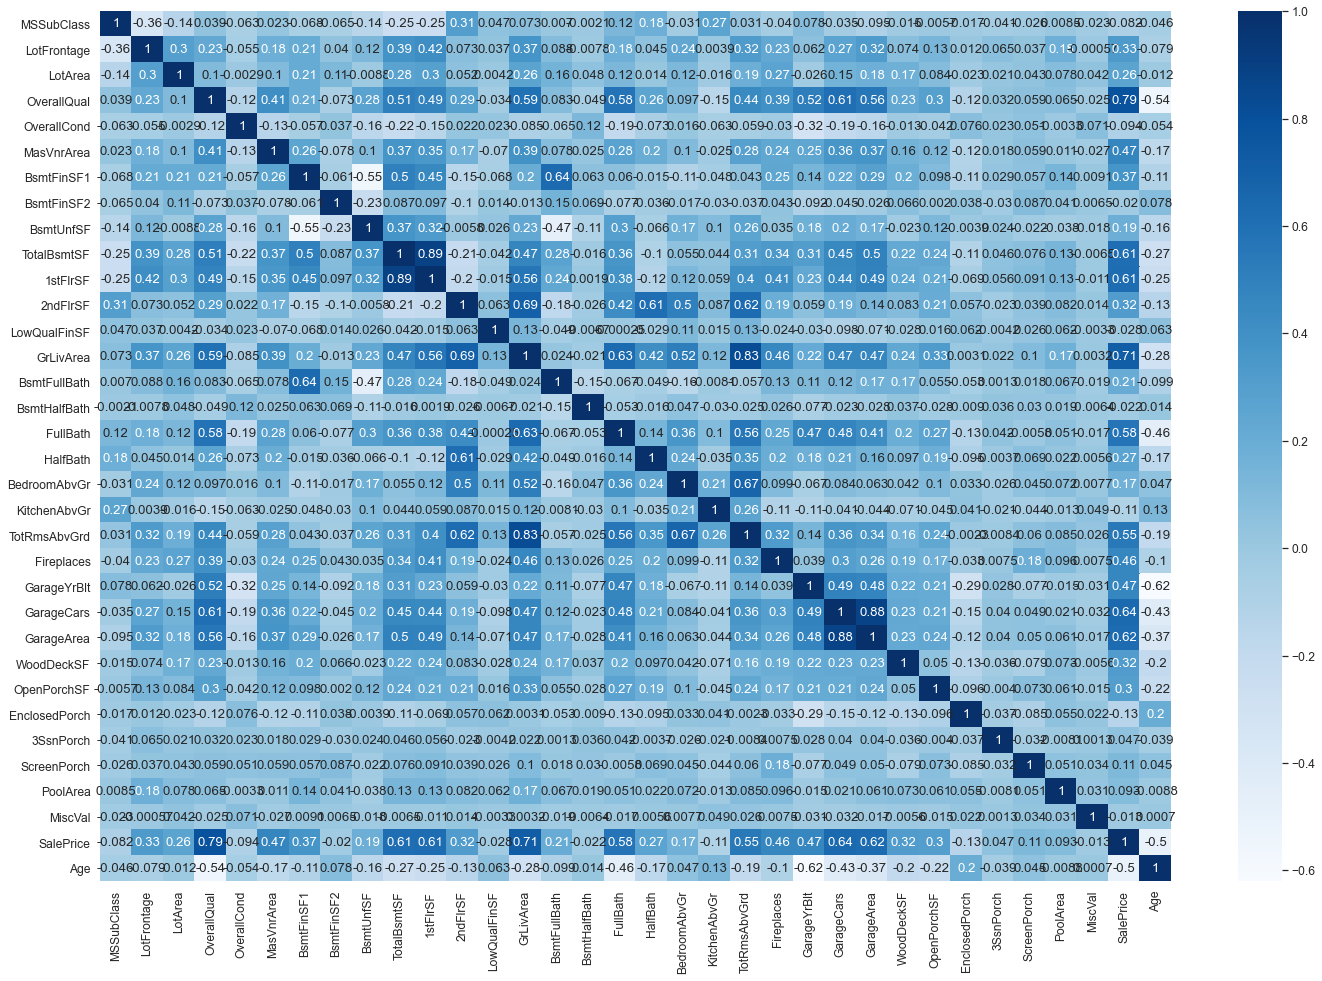

In [465]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,16))

# heatmap
#sns.heatmap(cor, cmap="YlGnBu", annot=True)
sns.heatmap(cor, cmap="Blues", annot=True)

plt.show()


Observations: Based on the correlation we can make few following interpretations
- SalePrice is highly positively correlated to the Overall Quality(0.79)
- SalePrice is highly positively correlated to the GrLivArea (0.71)
- SalePrice is highly positively correlated to the GarageCars(0.64)
- SalePrice is highly positively correlated to the GarageAre(0.62)
- SalePrice is highly positively correlated to the 1stFlrSF (0.61)
- SalePrice is highly positively correlated to the TotalBsmtSF (0.61)
- SalePrice is highly positively correlated to the FullBath(0.58)
- SalePrice is highly positively correlated to the TotRmsAbvGrd(0.55)

- SalePrice is highly negatively correlated to the Age(-0.5)

### Bivariate analysis 

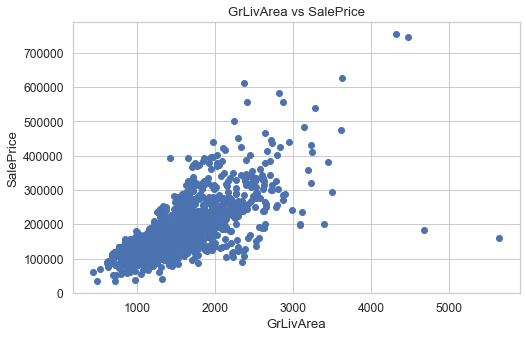

In [466]:
plt.scatter(df_modified.GrLivArea, df_modified.SalePrice)
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

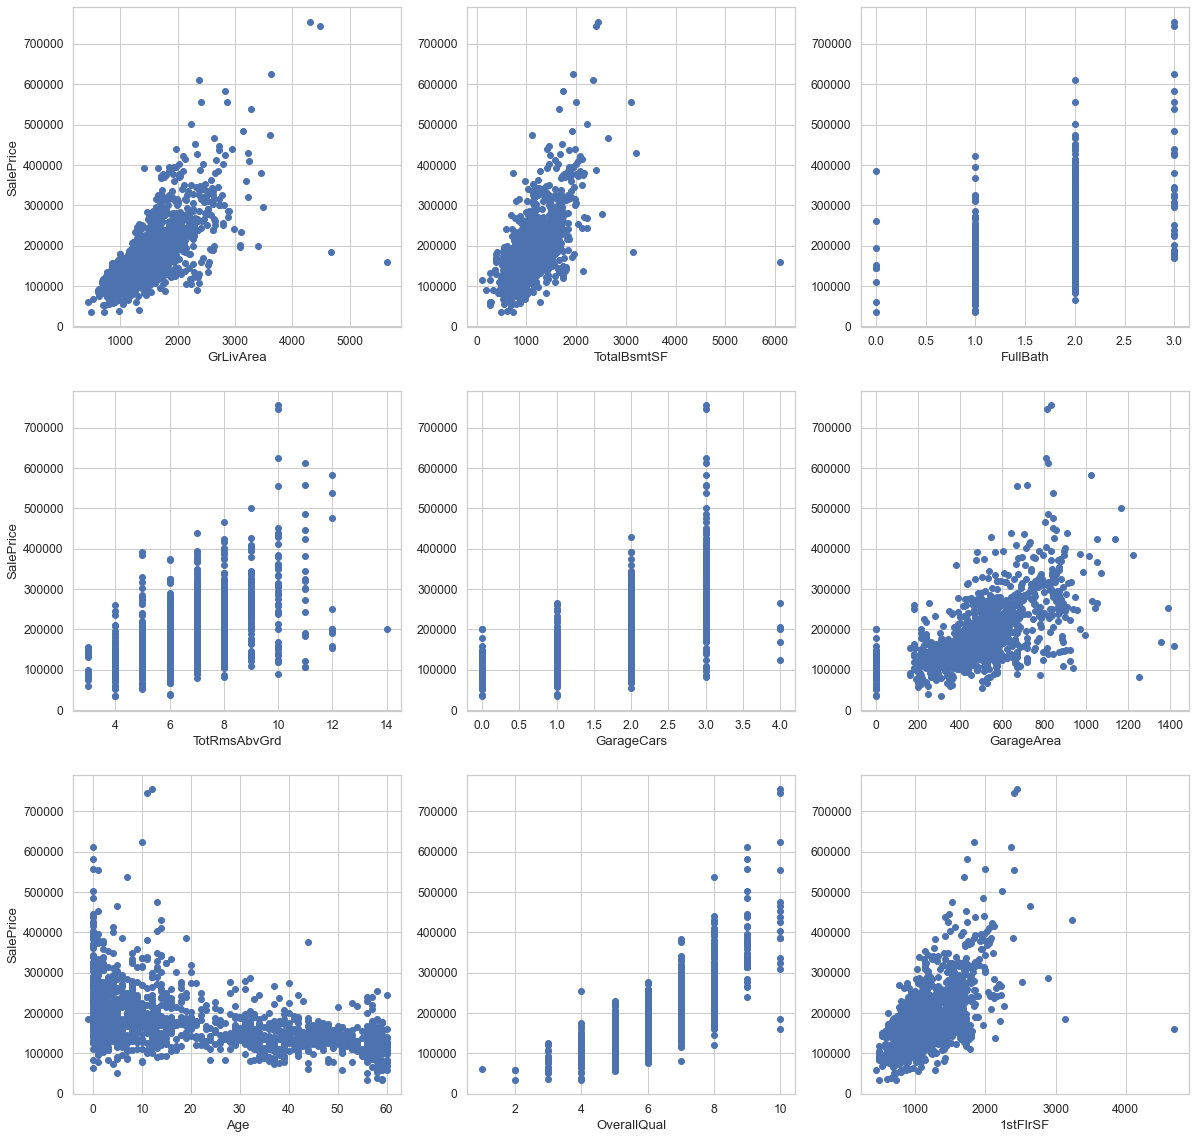

In [467]:
#Pairplot of the top 10 correlated variables against the target variable, Salesprice
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
plt.scatter(df_modified.GrLivArea, df_modified.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

plt.subplot(3,3,2)
plt.scatter(df_modified.TotalBsmtSF, df_modified.SalePrice)
plt.xlabel('TotalBsmtSF')

plt.subplot(3,3,3)
plt.scatter(df_modified.FullBath, df_modified.SalePrice)
plt.xlabel('FullBath')

plt.subplot(3,3,4)
plt.scatter(df_modified.TotRmsAbvGrd, df_modified.SalePrice)
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')

plt.subplot(3,3,5)
plt.scatter(df_modified.GarageCars, df_modified.SalePrice)
plt.xlabel('GarageCars')
plt.subplot(3,3,6)
plt.scatter(df_modified.GarageArea, df_modified.SalePrice)
plt.xlabel('GarageArea')

plt.subplot(3,3,7)
plt.scatter(df_modified.Age, df_modified.SalePrice)
plt.xlabel('Age')
plt.ylabel('SalePrice')

plt.subplot(3,3,8)
plt.scatter(df_modified.OverallQual, df_modified.SalePrice)
plt.xlabel('OverallQual')
plt.subplot(3,3,9)

plt.scatter(df_modified['1stFlrSF'], df_modified.SalePrice)
plt.xlabel('1stFlrSF')
plt.show()

Observation : 
- Most of the variables are linearly correlated to SalePrice so linear regression can be done.


### Analysing the Categorical columns 

In [468]:
categorical_features  = df_modified.dtypes[df_modified.dtypes == "object"].index
categorical_features  

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

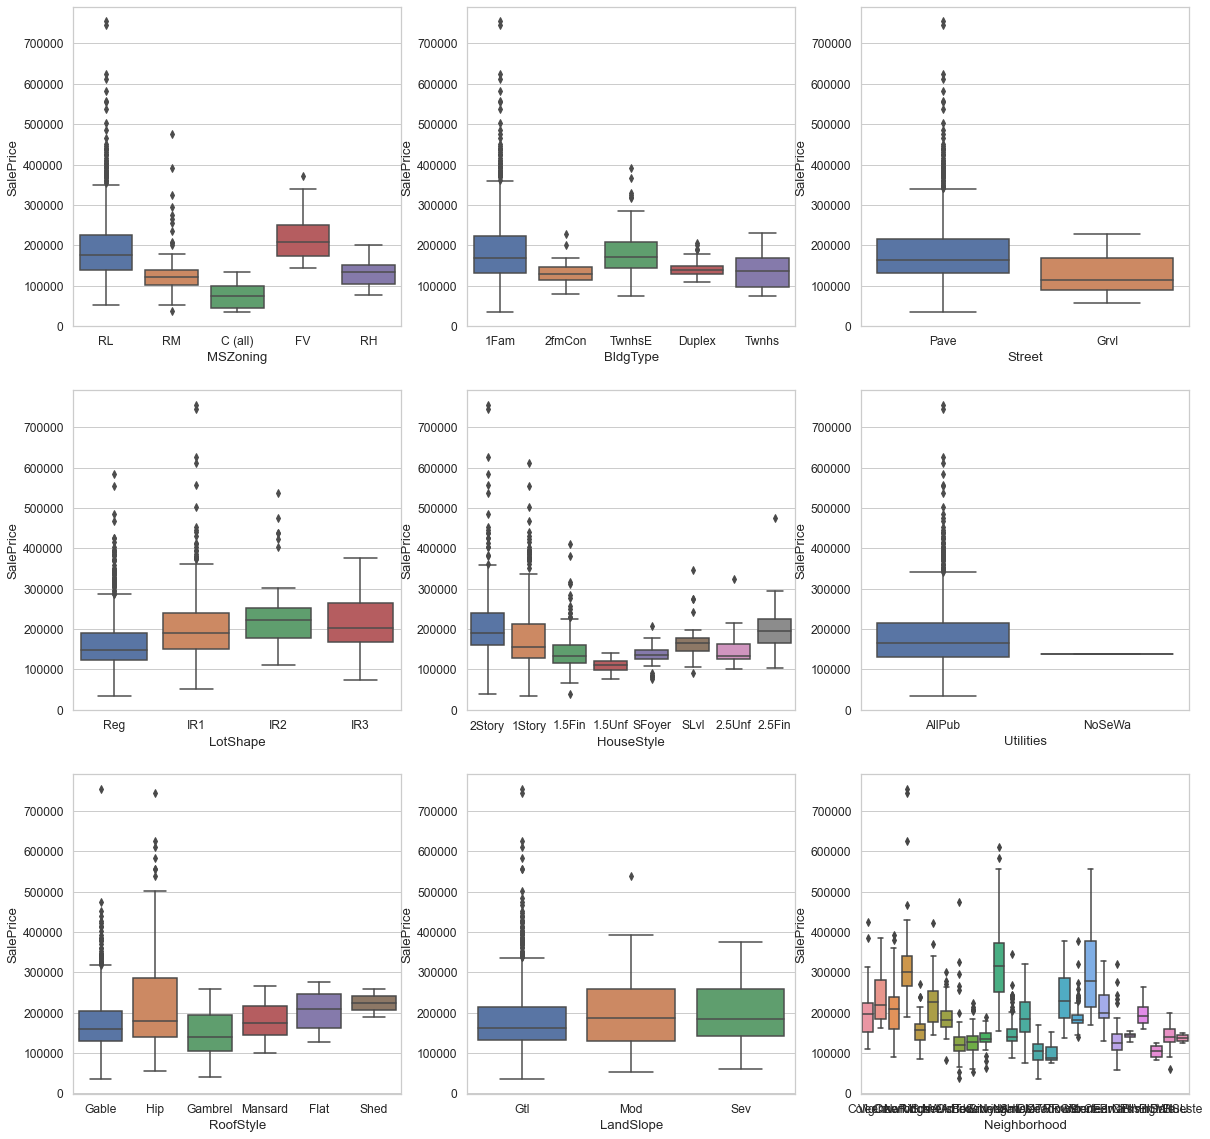

In [469]:
#Box plot for  analyzing the categorical features which could influence the output variable, Sales price
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
sns.boxplot(x='MSZoning', y="SalePrice", data=df_modified)
plt.subplot(3,3,2)
sns.boxplot(x='BldgType', y="SalePrice", data=df_modified)
plt.subplot(3,3,3)
sns.boxplot(x='Street', y="SalePrice", data=df_modified)
plt.subplot(3,3,4)
sns.boxplot(x='LotShape', y="SalePrice", data=df_modified)
plt.subplot(3,3,5)
sns.boxplot(x='HouseStyle', y="SalePrice", data=df_modified)
plt.subplot(3,3,6)
sns.boxplot(x='Utilities', y="SalePrice", data=df_modified)
plt.subplot(3,3,7)
sns.boxplot(x='RoofStyle', y="SalePrice", data=df_modified)
plt.subplot(3,3,8)
sns.boxplot(x='LandSlope', y="SalePrice", data=df_modified)
plt.subplot(3,3,9)
sns.boxplot(x='Neighborhood', y="SalePrice", data=df_modified)
plt.show()

#### Observations - 
- MsZoning with of type 'Fv' has high Saleprice and type 'C' has least sale price
- The Street of type 'Pave' has more Sale Price when compared to 'Grvl'
- The utlities coulumns have most of its values as 'AllPub' 

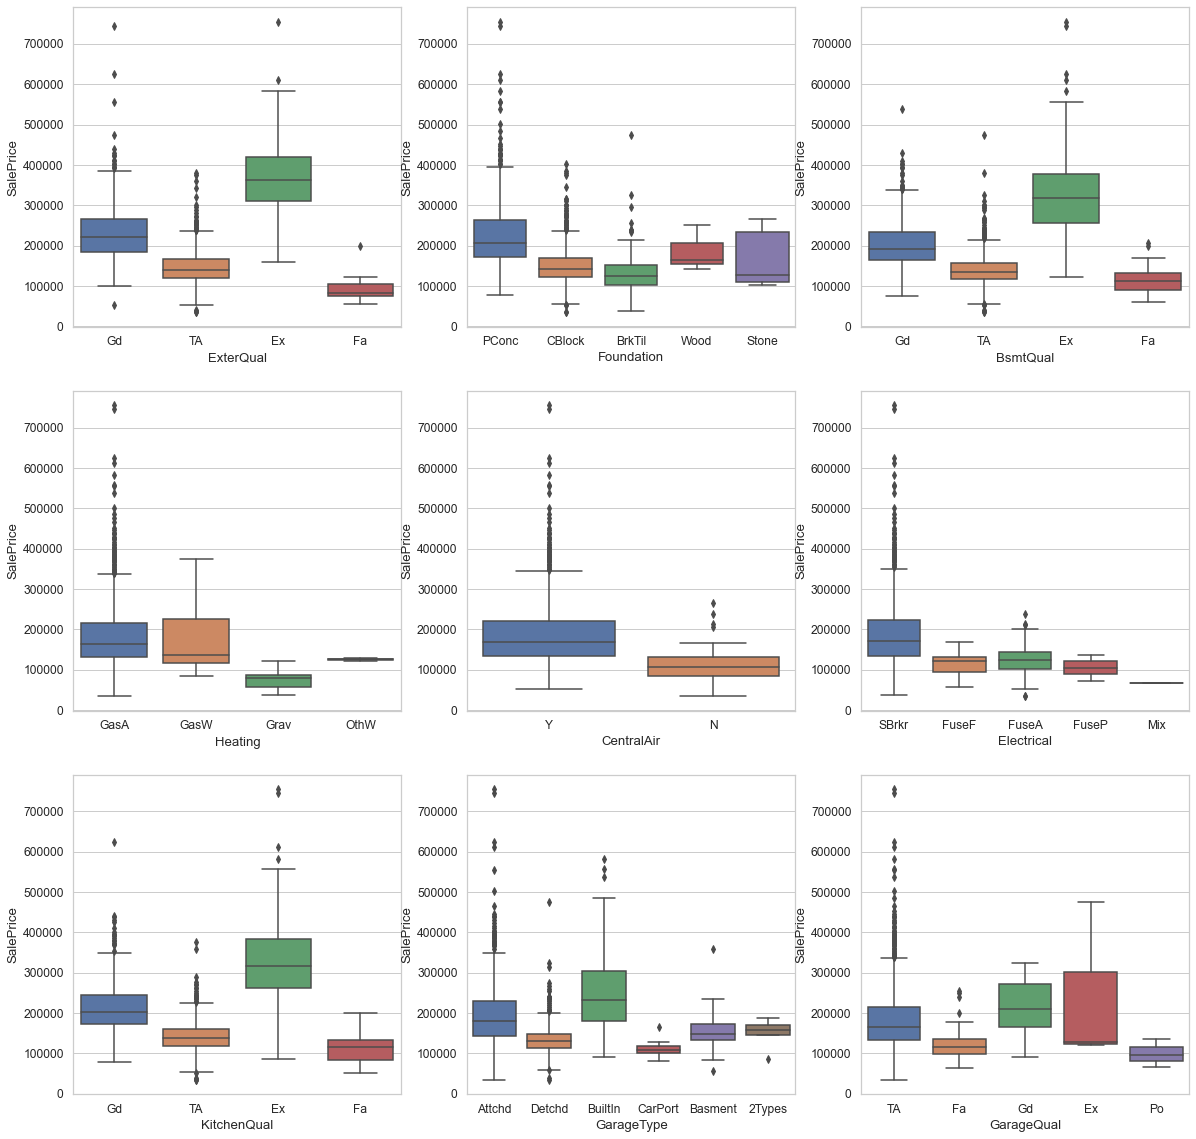

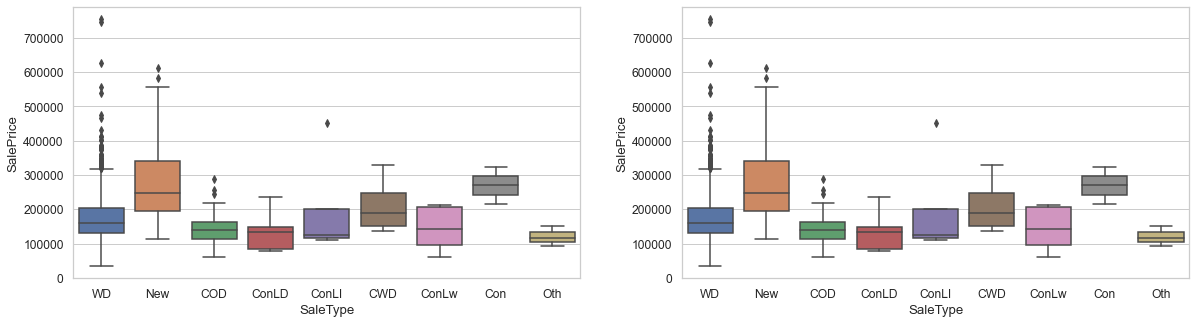

In [470]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
sns.boxplot(x='ExterQual', y="SalePrice", data=df_modified)
plt.subplot(3,3,2)
sns.boxplot(x='Foundation', y="SalePrice", data=df_modified)
plt.subplot(3,3,3)
sns.boxplot(x='BsmtQual', y="SalePrice", data=df_modified)
plt.subplot(3,3,4)
sns.boxplot(x='Heating', y="SalePrice", data=df_modified)
plt.subplot(3,3,5)
sns.boxplot(x='CentralAir', y="SalePrice", data=df_modified)
plt.subplot(3,3,6)
sns.boxplot(x='Electrical', y="SalePrice", data=df_modified)
plt.subplot(3,3,7)
sns.boxplot(x='KitchenQual', y="SalePrice", data=df_modified)
plt.subplot(3,3,8)
sns.boxplot(x='GarageType', y="SalePrice", data=df_modified)
plt.subplot(3,3,9)
sns.boxplot(x='GarageQual', y="SalePrice", data=df_modified)
plt.show()
plt.figure(figsize = (20,5)) 
plt.subplot(1,2,1)
sns.boxplot(x='SaleType', y="SalePrice", data=df_modified)
plt.subplot(1,2,2)
sns.boxplot(x='SaleType', y="SalePrice", data=df_modified)
plt.show()

Observations:
- The house with Exterior Quality of type Execellent has the highest SalePrice.
- The house with Basement Quality of type Execellent has the highest SalePrice.
- The house with Kitchen Quality of type Execellent has the highest SalePrice.
- The house with Garage Quality of type Execellent has the highest SalePrice.
- The house with Garage Type of type BuiltIn has the highest SalePrice.
- The house with Sale Type of type New has the highest SalePrice.
- The Central air of type 'Yes' has more Sale Price when compared to 'No'


## 4. Data Preprocessing

Analysing the Output variable : Sales Price

In [471]:
#Statistical info of the output variable
df_modified['SalePrice'].describe()

count      1412.000000
mean     182507.021955
std       79270.416057
min       34900.000000
25%      131475.000000
50%      164600.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

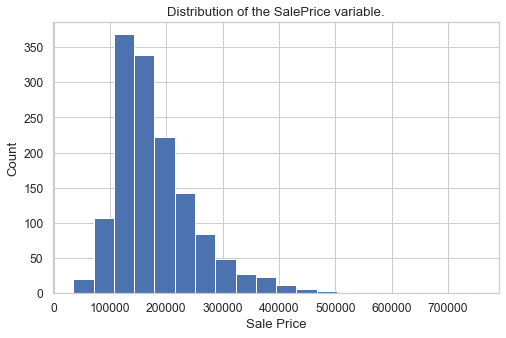

In [472]:
#Checking the distribution the SalePrice
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(df_modified['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}).set(xlabel='Sale Price', ylabel='Count');
plt.title("Distribution of the SalePrice variable.")
plt.show()


 mu = 182507.02 and sigma = 79242.34



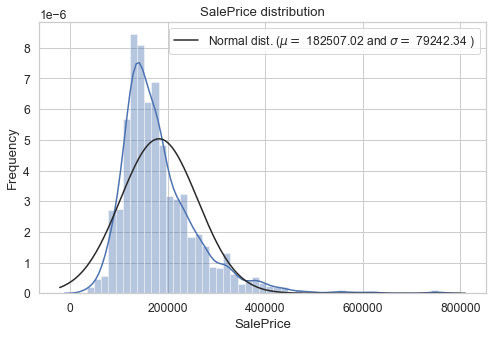

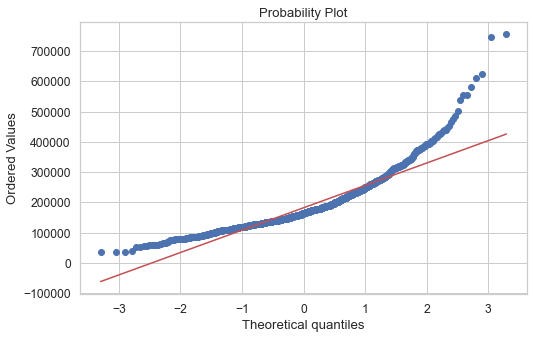

In [473]:
#Fit normal distribution
sns.distplot(df_modified['SalePrice'] , fit=norm);
# Estimate the mean,mu and standard deviation, sigma using the fit function
(mu, sigma) = norm.fit(df_modified['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
#Plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(df_modified['SalePrice'], plot=plt)
plt.show()

#### Observation: The target variable is right skewed.We need to transform this variable and make it normally distributed. Hence using log tranformation method


 mu = 12.03 and sigma = 0.39



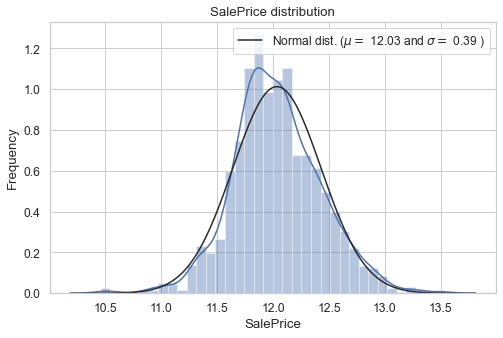

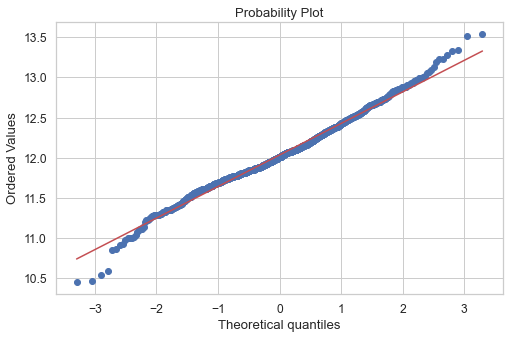

In [474]:
### Log-transformation of the target variable

df_modified["SalePrice"] = np.log(df_modified["SalePrice"])

#Checking the new distribution 
sns.distplot(df_modified['SalePrice'] , fit=norm);

# Estimating the mean, mu and standard deviation, sigma using the fit function
(mu, sigma) = norm.fit(df_modified['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(df_modified['SalePrice'], plot=plt)
plt.show()

#### Manual Encoding of a few categorical variables

In [475]:
# List of variables to map
def map_function(x):
    return x.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Na':0})
def map_function1(x):
    return x.map({'Gd':4,'Av':3,'Mn':2,'No':1,'Na':0})
def map_function2(x):
    return x.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
def map_function3(x):
    return x.map({'Y':1,'N':0})
def map_function4(x):
    return x.map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1})
def map_function5(x):
    return x.map({'Fin':3,'RFn':2,'Unf':1,'NA':0,'Unknown':0})
def map_function6(x):
    return x.map({'Y':2,'P':2,'N':0})



In [476]:
#Mapping function to the categorical columns
df_modified['ExterQual'] = df_modified[['ExterQual']].apply(map_function)
df_modified['ExterCond'] = df_modified[['ExterCond']].apply(map_function)
df_modified['BsmtQual'] = df_modified[['BsmtQual']].apply(map_function)
df_modified['BsmtCond'] = df_modified[['BsmtCond']].apply(map_function)
df_modified['BsmtExposure'] = df_modified[['BsmtExposure']].apply(map_function1)
df_modified['BsmtFinType1'] = df_modified[['BsmtFinType1']].apply(map_function2)
df_modified['BsmtFinType2'] = df_modified[['BsmtFinType2']].apply(map_function2)
df_modified['HeatingQC'] = df_modified[['HeatingQC']].apply(map_function)
df_modified['CentralAir'] = df_modified[['CentralAir']].apply(map_function3)
df_modified['KitchenQual'] = df_modified[['KitchenQual']].apply(map_function)
df_modified['Functional'] = df_modified[['Functional']].apply(map_function4)
df_modified['GarageFinish'] = df_modified[['GarageFinish']].apply(map_function5)
df_modified['GarageQual'] = df_modified[['GarageQual']].apply(map_function)
df_modified['GarageCond'] = df_modified[['GarageCond']].apply(map_function)
df_modified['PavedDrive'] = df_modified[['PavedDrive']].apply(map_function6)

In [477]:
#Convert the column MSSubClass as categorical as it is a categorical col and not numerical
df_modified['MSSubClass']=df_modified['MSSubClass'].astype('object')

In [478]:
categorical_features  = df_modified.dtypes[df_modified.dtypes == "object"].index
categorical_features  

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'Electrical', 'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

In [479]:
#Checking the number of missing values and calculating its percentage
Missingvalues_total = df_modified.isnull().sum().sort_values(ascending = False)
Missingvalues_Perc = (100*df_modified.isnull().sum()/df_modified.shape[0]).sort_values(ascending = False)


In [480]:
df_total_missingvalues = pd.concat([Missingvalues_total,Missingvalues_Perc], axis=1, keys=['Missingvalues_total','Missingvalues_Perc'])
df_total_missingvalues

,Missingvalues_total,Missingvalues_Perc
Age,0,0.0
SalePrice,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0
BsmtQual,0,0.0


#### Dummy variable creation for other categorical variables

In [481]:
# Creating dummies
dummy = pd.get_dummies(df_modified[['MSSubClass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition']], drop_first=True)

In [482]:
dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [483]:
df_modified = pd.concat([df_modified, dummy], axis=1)
df_modified.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0


In [484]:
# Drop those columns whose dummies have already been created
df_modified=df_modified.drop(['MSSubClass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition'], axis = 1)
df_modified.shape

(1412, 202)

In [485]:
#Checking the number of missing values and calculating its percentage
Missingvalues_total = df_modified.isnull().sum().sort_values(ascending = False)
Missingvalues_Perc = (100*df_modified.isnull().sum()/df_modified.shape[0]).sort_values(ascending = False)

In [486]:
df_total_missingvalues = pd.concat([Missingvalues_total,Missingvalues_Perc], axis=1, keys=['Missingvalues_total','Missingvalues_Perc'])
df_total_missingvalues

,Missingvalues_total,Missingvalues_Perc
SaleCondition_Partial,0,0.0
MSZoning_RH,0,0.0
Utilities_NoSeWa,0,0.0
LandContour_Lvl,0,0.0
LandContour_Low,0,0.0
LandContour_HLS,0,0.0
LotShape_Reg,0,0.0
LotShape_IR3,0,0.0
LotShape_IR2,0,0.0
Street_Pave,0,0.0


## 5. Data Modelling 

In [487]:
# Test Train split
np.random.seed(0)
housing_train,housing_test = train_test_split(df_modified, train_size=0.7,random_state=100)


In [488]:
print(housing_train.shape)
print(housing_test.shape)

(988, 202)
(424, 202)


In [489]:
#Display the first few rows of train dataframe
housing_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
53,68.0,50271,9,5,0.0,4,3,5,3,4,...,0,0,0,0,1,0,0,0,1,0
211,83.0,10420,6,5,0.0,3,3,4,3,2,...,0,0,0,0,1,0,0,0,1,0
550,53.0,4043,6,6,0.0,3,3,4,3,1,...,0,0,0,0,0,0,0,0,0,0
640,62.0,12677,8,5,472.0,5,3,5,3,4,...,0,0,0,0,1,0,0,0,1,0
1113,66.0,8923,5,7,0.0,3,3,3,3,1,...,0,0,0,0,1,0,0,0,1,0


In [490]:
#Display the first few rows of test dataframe
housing_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
357,44.0,4224,5,5,0.0,3,3,4,3,1,...,0,0,0,0,1,0,0,0,1,0
512,70.0,9100,5,5,0.0,3,3,3,3,1,...,0,0,0,0,1,0,0,0,1,0
548,49.0,8235,5,7,0.0,3,4,3,3,1,...,0,0,0,0,1,0,0,0,1,0
546,70.0,8737,6,7,0.0,3,3,4,3,1,...,0,0,0,0,1,0,0,0,1,0
888,95.0,15865,8,6,0.0,4,4,3,4,4,...,0,0,0,0,1,0,0,0,1,0


In [491]:
y_train=housing_train.pop('SalePrice')
X_train=housing_train

In [492]:
y_test=housing_test.pop('SalePrice')
X_test=housing_test

### Scaling the numerical variables

In [493]:
scaler=MinMaxScaler()
numeric_features = X_train.dtypes[X_train.dtypes != "object"].index
X_train[numeric_features]=scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features]=scaler.transform(X_test[numeric_features])
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
53,0.160959,0.228895,0.888889,0.500,0.000000,0.666667,0.5,1.000000,0.666667,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
211,0.212329,0.042628,0.555556,0.500,0.000000,0.333333,0.5,0.666667,0.666667,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
550,0.109589,0.012821,0.555556,0.625,0.000000,0.333333,0.5,0.666667,0.666667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
640,0.140411,0.053177,0.777778,0.500,0.418069,1.000000,0.5,1.000000,0.666667,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1113,0.154110,0.035631,0.444444,0.750,0.000000,0.333333,0.5,0.333333,0.666667,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [494]:
#Statistical info
X_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,...,988.000000,988.000000,988.000000,988.000000,988.000000,988.0,988.000000,988.000000,988.000000,988.000000
mean,0.166602,0.042993,0.567814,0.575784,0.087242,0.463225,0.521508,0.521930,0.670715,0.224696,...,0.004049,0.004049,0.080972,0.001012,0.867409,0.0,0.007085,0.017206,0.816802,0.082996
std,0.074094,0.050616,0.150756,0.140325,0.147576,0.189495,0.089920,0.224755,0.097159,0.351106,...,0.063532,0.063532,0.272930,0.031814,0.339304,0.0,0.083916,0.130106,0.387025,0.276016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.028947,0.444444,0.500000,0.000000,0.333333,0.500000,0.333333,0.666667,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,0.164384,0.038309,0.555556,0.500000,0.000000,0.333333,0.500000,0.666667,0.666667,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,0.198630,0.048087,0.666667,0.625000,0.139947,0.666667,0.500000,0.666667,0.666667,0.666667,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [495]:
y_train.head()

53      12.860999
211     12.133502
550     11.849398
640     12.520883
1113    11.809319
Name: SalePrice, dtype: float64

### RFE : Recursive feature elimination

In [496]:
lm = LinearRegression()  # Instantiating
lm.fit(X_train, y_train)

LinearRegression()

In [497]:
#Print the intercept and coefficients 
print(lm.intercept_)
print(lm.coef_)

-194585761060.31497
[ 1.42168318e-01  5.69601501e-01  3.86643743e-01  2.21564652e-01
  3.45221293e-02  2.05192613e-02 -7.11855938e-02  2.86081599e-02
  1.32495445e-02  3.25146429e-02  2.28337980e-02 -1.26279820e+11
 -2.24399754e-02 -8.88055606e+10 -1.40739342e+11  1.86467578e+11
  3.62731639e-02  7.56332908e-02  1.52795953e+11  1.13090912e+11
  3.13259087e+10 -2.21143390e+11  8.15338710e-02  6.19882679e-03
  9.29662363e-02  6.16695812e-02 -5.61075444e-02 -1.19588630e-01
  4.51772179e-02  2.60407839e-02  1.26674494e-01  6.65834771e-02
  5.57329722e-03  2.32321182e-02  1.27553642e-01  8.82304140e-02
  2.18169826e-01 -6.51040425e-02 -7.72988512e-03  6.39834596e-02
  9.73981639e-03  1.49019128e-02  4.77974293e-02  9.18686028e-02
  9.56335485e-02 -1.18771520e-02 -4.96218955e-02 -7.32588514e-02
  2.44964265e-02 -3.32111921e-01 -1.53461843e-02 -4.27849364e-02
 -4.27738713e-02 -1.73744139e-01 -1.36574764e-01 -5.81261474e-02
 -1.22265000e+11 -5.35863162e-02 -1.40299924e-01 -1.15696294e-01
 -1.2

In [498]:
# Importing RFE
from sklearn.feature_selection import RFE
lm = LinearRegression()   
rfe = RFE(lm, 90)
rfe.fit(X_train, y_train)  
#True or False 
print(rfe.support_)          
print(rfe.ranking_)

[ True  True  True  True False False  True False False False False  True
 False  True  True  True False  True  True  True  True  True  True False
  True False False  True  True False  True False False False  True False
  True False False  True False False False  True False False  True False
 False  True False False False  True  True  True  True False  True  True
  True  True  True  True  True  True False False False False False False
  True False False  True False False  True False False False False False
  True False False False  True False False False False False  True  True
 False False False False  True False  True False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
 False False  True False False  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
 False False False False False False False False False False False  True
 False  True False False False False False False  T

In [499]:
#Displaying the features selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'ExterCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'GarageCars',
       'GarageQual', 'WoodDeckSF', 'ScreenPorch', 'Age', 'MSSubClass_45',
       'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90',
       'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave',
       'Utilities_NoSeWa', 'LotConfig_FR3', 'LandSlope_Sev',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm',
       'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe',
       'Condition2_RRAn', 'Condition2_RRNn', 'BldgTyp

In [500]:
# Features that are not included by RFE
X_train.columns[~rfe.support_]

Index(['MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'BsmtHalfBath', 'HalfBath',
       ...
       'GarageType_BuiltIn', 'GarageType_Detchd', 'SaleType_CWD',
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLw', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Family',
       'SaleCondition_Partial'],
      dtype='object', length=111)

In [501]:
# Build the first model with features selected by RFE 
X_train_rfe_one =X_train[col]

In [502]:
import statsmodels.api as sm  
X_train_rfe_one = sm.add_constant(X_train_rfe_one) 
X_train_rfe_one.head()

,const,LotFrontage,LotArea,OverallQual,OverallCond,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Foundation_Wood,Heating_Grav,Heating_OthW,Electrical_Mix,GarageType_CarPort,SaleType_ConLI,SaleType_New,SaleType_Oth,SaleCondition_Alloca,SaleCondition_Normal
53,1.0,0.160959,0.228895,0.888889,0.500,0.5,0.863550,0.0,0.013699,0.561228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
211,1.0,0.212329,0.042628,0.555556,0.500,0.5,0.017176,0.0,0.503425,0.357674,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
550,1.0,0.109589,0.012821,0.555556,0.625,0.5,0.266698,0.0,0.218322,0.311470,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
640,1.0,0.140411,0.053177,0.777778,0.500,0.5,0.581107,0.0,0.128425,0.456543,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1113,1.0,0.154110,0.035631,0.444444,0.750,0.5,0.306775,0.0,0.156250,0.291761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [503]:
lm1 = sm.OLS(y_train, X_train_rfe_one).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     149.5
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:51:36   Log-Likelihood:                 846.57
No. Observations:                 988   AIC:                            -1527.
Df Residuals:                     905   BIC:                            -1121.
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.5111 

In [504]:
# Computing the VIFs for new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_one.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_one.values, i) for i in range(X_train_rfe_one.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif

,Features,VIF
0,const,0.00
1,LotFrontage,1.63
2,LotArea,2.05
3,OverallQual,3.68
4,OverallCond,1.78
5,ExterCond,1.43
6,BsmtFinSF1,inf
7,BsmtFinSF2,inf
8,BsmtUnfSF,inf
9,TotalBsmtSF,inf


Observation : The Linear regression model built with 90 columns selected by RFE technique and the columns has VIF value of infinite which shows multicollinearity.

In [505]:
#Deleting the other columns excluded by RFE techinque
X_train = X_train[col]
X_test = X_test[col]
X_train

,LotFrontage,LotArea,OverallQual,OverallCond,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,...,Foundation_Wood,Heating_Grav,Heating_OthW,Electrical_Mix,GarageType_CarPort,SaleType_ConLI,SaleType_New,SaleType_Oth,SaleCondition_Alloca,SaleCondition_Normal
53,0.160959,0.228895,0.888889,0.500,0.50,0.863550,0.0,0.013699,0.561228,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
211,0.212329,0.042628,0.555556,0.500,0.50,0.017176,0.0,0.503425,0.357674,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
550,0.109589,0.012821,0.555556,0.625,0.50,0.266698,0.0,0.218322,0.311470,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
640,0.140411,0.053177,0.777778,0.500,0.50,0.581107,0.0,0.128425,0.456543,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1113,0.154110,0.035631,0.444444,0.750,0.50,0.306775,0.0,0.156250,0.291761,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,0.099315,0.022576,0.444444,0.625,0.50,0.374046,0.0,0.000000,0.219386,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,0.270548,0.041483,0.555556,0.500,0.50,0.233779,0.0,0.400257,0.426494,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
360,0.164384,0.029166,0.555556,0.625,0.50,0.368798,0.0,0.049229,0.252989,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
81,0.037671,0.014957,0.555556,0.500,0.75,0.572996,0.0,0.015411,0.365751,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Advance Regression

### Ridge Regression 
Tuning different parameters values for alpha

In [506]:
# Lets assume alpha is 0.001 and building a Ridge regression model
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))


0.9312555215363432


In [507]:
# Tuning the hyperparameters
params = {'alpha':  [0.001,0.01,0.5, 1.0, 10.0, 50, 100,500, 1000]}

# Build model using Ridge regression
ridge = Ridge()

# Perform Cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.5s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1.0, 10.0, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [508]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#Displaying the results after performing cross validation
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007074,0.003555,0.003386,0.000971,0.001,{'alpha': 0.001},-0.087729,-0.088132,-0.085481,-0.077245,...,-0.085226,0.004095,4,-0.072145,-0.072715,-0.071713,-0.075133,-0.071916,-0.072725,0.001250
1,0.004886,0.000833,0.002819,0.000571,0.01,{'alpha': 0.01},-0.087561,-0.088044,-0.085477,-0.076989,...,-0.085071,0.004133,3,-0.072206,-0.072743,-0.071741,-0.075206,-0.071994,-0.072778,0.001258
2,0.004263,0.000276,0.002528,0.000046,0.5,{'alpha': 0.5},-0.084465,-0.087233,-0.086228,-0.072473,...,-0.083482,0.005590,1,-0.074206,-0.074293,-0.073332,-0.077333,-0.073754,-0.074584,0.001417
3,0.005226,0.000918,0.003360,0.001425,1,{'alpha': 1.0},-0.083862,-0.087942,-0.087316,-0.072451,...,-0.083772,0.005839,2,-0.075683,-0.075564,-0.074663,-0.078807,-0.075012,-0.075946,0.001478
4,0.006090,0.001656,0.003024,0.000363,10,{'alpha': 10.0},-0.096275,-0.099444,-0.095576,-0.077580,...,-0.092419,0.007681,5,-0.087632,-0.086760,-0.087294,-0.090518,-0.087328,-0.087906,0.001336
5,0.005111,0.000520,0.003117,0.000737,50,{'alpha': 50},-0.137581,-0.133861,-0.126314,-0.107492,...,-0.126005,0.010393,6,-0.122286,-0.121548,-0.122633,-0.125306,-0.122581,-0.122871,0.001278
6,0.005647,0.001411,0.003798,0.001200,100,{'alpha': 100},-0.163663,-0.159939,-0.152531,-0.133317,...,-0.151666,0.010560,7,-0.148330,-0.148011,-0.148581,-0.151380,-0.149582,-0.149177,0.001221
7,0.005120,0.000557,0.003254,0.000679,500,{'alpha': 500},-0.235463,-0.229845,-0.230353,-0.205798,...,-0.226140,0.010410,8,-0.223075,-0.224071,-0.223899,-0.227178,-0.225707,-0.224786,0.001469
8,0.005031,0.000609,0.003052,0.000358,1000,{'alpha': 1000},-0.264517,-0.258615,-0.258561,-0.233482,...,-0.255230,0.011089,9,-0.252047,-0.253302,-0.253620,-0.257434,-0.254477,-0.254176,0.001806


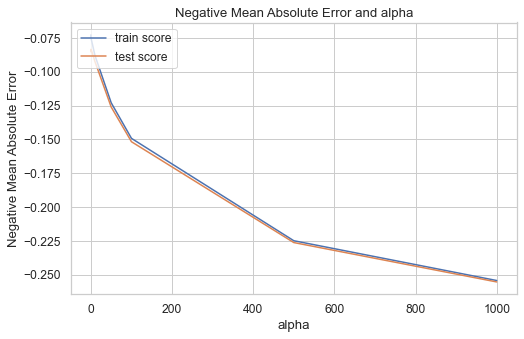

In [509]:
# Plot the mean test scores and mean train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Observation : We can observe that the alpha value is between 0- 20, hence tuning the parameters accordingly.

In [510]:
# Hyperparameter tuning : list of alphas to tune
params = {'alpha': [0.001,0.01, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]}

ridge = Ridge()
# Performing Cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.7s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [511]:
#Displaying the crossvalidation results 
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(12)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004899,0.000775,0.002707,0.000367,0.001,{'alpha': 0.001},-0.087729,-0.088132,-0.085481,-0.077245,...,-0.085226,0.004095,4,-0.072145,-0.072715,-0.071713,-0.075133,-0.071916,-0.072725,0.001250
1,0.004325,0.000101,0.002512,0.000054,0.01,{'alpha': 0.01},-0.087561,-0.088044,-0.085477,-0.076989,...,-0.085071,0.004133,3,-0.072206,-0.072743,-0.071741,-0.075206,-0.071994,-0.072778,0.001258
2,0.005454,0.000764,0.003560,0.000422,1,{'alpha': 1.0},-0.083862,-0.087942,-0.087316,-0.072451,...,-0.083772,0.005839,1,-0.075683,-0.075564,-0.074663,-0.078807,-0.075012,-0.075946,0.001478
3,0.006310,0.001614,0.003878,0.000973,2,{'alpha': 2.0},-0.084477,-0.089231,-0.088532,-0.072518,...,-0.084437,0.006177,2,-0.077601,-0.077313,-0.076583,-0.080745,-0.076920,-0.077832,0.001496
4,0.004754,0.001074,0.002752,0.000319,3,{'alpha': 3.0},-0.085470,-0.090817,-0.089506,-0.072725,...,-0.085231,0.006507,5,-0.079088,-0.078616,-0.078147,-0.082196,-0.078375,-0.079285,0.001489
5,0.004466,0.000389,0.002600,0.000163,4,{'alpha': 4.0},-0.086671,-0.092232,-0.090389,-0.073010,...,-0.086071,0.006804,6,-0.080386,-0.079900,-0.079565,-0.083529,-0.079721,-0.080620,0.001480
6,0.004230,0.000080,0.002510,0.000102,5,{'alpha': 5.0},-0.088154,-0.093573,-0.091150,-0.073451,...,-0.086981,0.007040,7,-0.081642,-0.081099,-0.080981,-0.084747,-0.081134,-0.081920,0.001431
7,0.004166,0.000039,0.002722,0.000519,6,{'alpha': 6.0},-0.089724,-0.094814,-0.091913,-0.074111,...,-0.087968,0.007201,8,-0.082827,-0.082253,-0.082329,-0.085924,-0.082480,-0.083163,0.001395
8,0.004185,0.000047,0.002456,0.000018,7,{'alpha': 7.0},-0.091329,-0.096017,-0.092727,-0.074876,...,-0.089033,0.007342,9,-0.084044,-0.083374,-0.083605,-0.087057,-0.083728,-0.084362,0.001365
9,0.004128,0.000016,0.002494,0.000056,8,{'alpha': 8.0},-0.093047,-0.097175,-0.093676,-0.075768,...,-0.090184,0.007460,10,-0.085276,-0.084493,-0.084863,-0.088186,-0.084940,-0.085551,0.001340


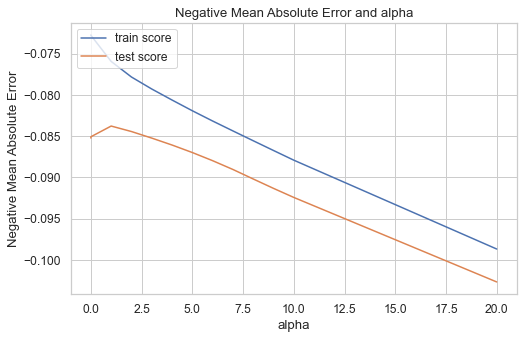

In [512]:
# Plot the mean test scores and mean train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Observation : We see observe that the optimal alpha value is between 0-2. 

In [513]:
# Determining best r2 score and the optimal value of alpha
print(model_cv.best_estimator_)
best_ridge_score = model_cv.best_score_

Ridge()


In [514]:
best_ridge_alpha = model_cv.best_params_["alpha"]
print(" The best r2 score is obtained at alpha {0}".format(best_ridge_alpha))

 The best r2 score is obtained at alpha 1.0


###  Ridge regression model :  optimal alpha value

In [515]:
# Ridge regression model building using optimal alpha
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [516]:
#Coefficients for ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = housing_train.columns
cols.insert(0,'const')
#abs done to capture highly negatively correlated variables
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']
#Select the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
0,LotFrontage,10.261566,10.261566
3,OverallCond,0.527282,0.527282
14,BsmtUnfSF,0.406426,0.406426
12,BsmtFinType2,0.355562,0.355562
2,OverallQual,0.338037,0.338037
11,BsmtFinSF1,0.322512,0.322512
9,BsmtExposure,0.316265,0.316265
33,GarageFinish,0.303286,0.303286
73,LotConfig_CulDSac,-0.272453,0.272453
6,ExterCond,0.264079,0.264079


In [517]:
# Compute r2 score on train using ridge regression
y_train_ridge_pred = ridge.predict(X_train)
print("Ridge regression train r2: ",round(metrics.r2_score(y_true=y_train, y_pred=y_train_ridge_pred),4))

Ridge regression train r2:  0.9272


In [518]:
#Compute r2 score on test using Ridge regression
y_test_ridge_pred = ridge.predict(X_test)
print("Ridge regression test r2: ",round(metrics.r2_score(y_true=y_test, y_pred=y_test_ridge_pred),4))

Ridge regression test r2:  0.7454


### Lasso Regression

In [519]:
# Hyperparameter tuning
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
lasso = Lasso()

# Perform Cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    1.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [520]:
#Displaying Cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.048851,0.009662,0.003561,0.001206,0.0001,{'alpha': 0.0001},-0.084382,-0.087006,-0.085744,-0.075277,...,-0.083873,0.004404,1,-0.074649,-0.074799,-0.073826,-0.078043,-0.074264,-0.075116,0.001502
1,0.007994,0.000403,0.002726,0.000312,0.001,{'alpha': 0.001},-0.086164,-0.092201,-0.093485,-0.076928,...,-0.087587,0.005902,2,-0.083873,-0.083371,-0.082818,-0.087159,-0.083161,-0.084076,0.001579
2,0.005062,0.000362,0.002724,0.000382,0.01,{'alpha': 0.01},-0.131869,-0.130858,-0.127702,-0.107628,...,-0.124137,0.008860,3,-0.123231,-0.122036,-0.121501,-0.123539,-0.120494,-0.122160,0.001120
3,0.004531,0.000413,0.002588,0.000133,0.05,{'alpha': 0.05},-0.276921,-0.264422,-0.263074,-0.243102,...,-0.264243,0.011819,4,-0.259093,-0.262451,-0.261413,-0.261942,-0.266934,-0.262367,0.002556
4,0.004862,0.000637,0.002744,0.000304,0.1,{'alpha': 0.1},-0.315126,-0.308787,-0.308269,-0.281726,...,-0.306029,0.012572,5,-0.302534,-0.304592,-0.305862,-0.311083,-0.303274,-0.305469,0.003029


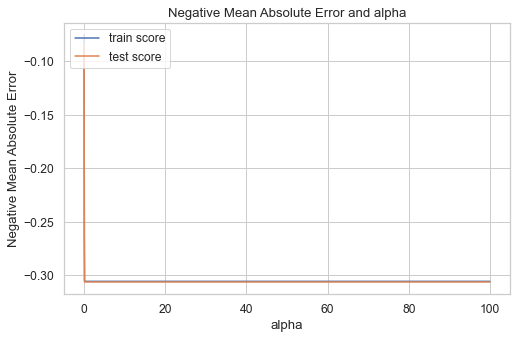

In [521]:
# Plot the mean test scores and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Observation : This graphs shows that alpha value might be less than 1

In [522]:
# Hyperparameter tuning
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
lasso = Lasso()

# Performing Cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    1.0s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [523]:
#Displaying the crossvalidation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009677,0.001250,0.002785,0.000224,0.001,{'alpha': 0.001},-0.086164,-0.092201,-0.093485,-0.076928,...,-0.087587,0.005902,1,-0.083873,-0.083371,-0.082818,-0.087159,-0.083161,-0.084076,0.001579
1,0.005164,0.000305,0.002962,0.000465,0.01,{'alpha': 0.01},-0.131869,-0.130858,-0.127702,-0.107628,...,-0.124137,0.008860,2,-0.123231,-0.122036,-0.121501,-0.123539,-0.120494,-0.122160,0.001120
2,0.005161,0.000870,0.002863,0.000389,0.05,{'alpha': 0.05},-0.276921,-0.264422,-0.263074,-0.243102,...,-0.264243,0.011819,3,-0.259093,-0.262451,-0.261413,-0.261942,-0.266934,-0.262367,0.002556
3,0.004961,0.000694,0.003127,0.000835,0.1,{'alpha': 0.1},-0.315126,-0.308787,-0.308269,-0.281726,...,-0.306029,0.012572,4,-0.302534,-0.304592,-0.305862,-0.311083,-0.303274,-0.305469,0.003029
4,0.006571,0.002766,0.003357,0.001332,0.2,{'alpha': 0.2},-0.315126,-0.308787,-0.308269,-0.281726,...,-0.306029,0.012572,4,-0.302534,-0.304592,-0.305862,-0.311083,-0.303274,-0.305469,0.003029


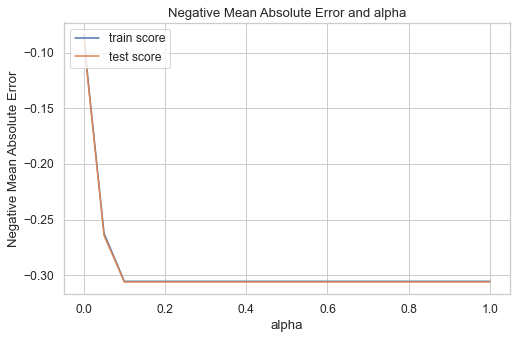

In [524]:
#Plot the mean test scores and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [525]:
# Check the current best parameter value for alpha 
model_cv.best_params_

{'alpha': 0.001}

In [526]:
# Hyperparamter tuning
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]}
lasso = Lasso()
# Perform Cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.5s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [527]:
#Displaying the Cross Validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.045977,0.005264,0.003270,0.000640,0.0001,{'alpha': 0.0001},-0.084382,-0.087006,-0.085744,-0.075277,...,-0.083873,0.004404,1,-0.074649,-0.074799,-0.073826,-0.078043,-0.074264,-0.075116,0.001502
1,0.008953,0.000162,0.003884,0.000269,0.001,{'alpha': 0.001},-0.086164,-0.092201,-0.093485,-0.076928,...,-0.087587,0.005902,2,-0.083873,-0.083371,-0.082818,-0.087159,-0.083161,-0.084076,0.001579
2,0.005728,0.000623,0.003040,0.000582,0.01,{'alpha': 0.01},-0.131869,-0.130858,-0.127702,-0.107628,...,-0.124137,0.008860,3,-0.123231,-0.122036,-0.121501,-0.123539,-0.120494,-0.122160,0.001120
3,0.005207,0.000358,0.003180,0.000367,0.05,{'alpha': 0.05},-0.276921,-0.264422,-0.263074,-0.243102,...,-0.264243,0.011819,4,-0.259093,-0.262451,-0.261413,-0.261942,-0.266934,-0.262367,0.002556
4,0.004985,0.000431,0.003059,0.000401,0.1,{'alpha': 0.1},-0.315126,-0.308787,-0.308269,-0.281726,...,-0.306029,0.012572,5,-0.302534,-0.304592,-0.305862,-0.311083,-0.303274,-0.305469,0.003029


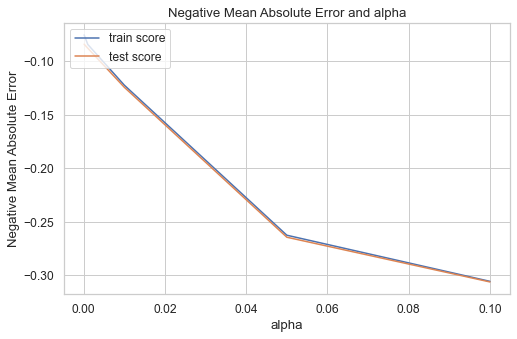

In [528]:
#Plot the mean test scores and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [529]:
# Hyperparamter tuning
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05]}
lasso = Lasso()
#Perform Cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [530]:
#Displaying the Cross Validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.047495,0.003452,0.002688,0.000147,1e-05,{'alpha': 1e-05},-0.087613,-0.087660,-0.085506,-0.076774,...,-0.084913,0.004143,2,-0.072370,-0.072827,-0.071868,-0.075445,-0.072145,-0.072931,0.001295
1,0.040368,0.003000,0.002556,0.000021,0.0001,{'alpha': 0.0001},-0.084382,-0.087006,-0.085744,-0.075277,...,-0.083873,0.004404,1,-0.074649,-0.074799,-0.073826,-0.078043,-0.074264,-0.075116,0.001502
2,0.008360,0.000535,0.002615,0.000110,0.001,{'alpha': 0.001},-0.086164,-0.092201,-0.093485,-0.076928,...,-0.087587,0.005902,3,-0.083873,-0.083371,-0.082818,-0.087159,-0.083161,-0.084076,0.001579
3,0.004956,0.000362,0.002498,0.000047,0.01,{'alpha': 0.01},-0.131869,-0.130858,-0.127702,-0.107628,...,-0.124137,0.008860,4,-0.123231,-0.122036,-0.121501,-0.123539,-0.120494,-0.122160,0.001120
4,0.004427,0.000087,0.002473,0.000016,0.05,{'alpha': 0.05},-0.276921,-0.264422,-0.263074,-0.243102,...,-0.264243,0.011819,5,-0.259093,-0.262451,-0.261413,-0.261942,-0.266934,-0.262367,0.002556


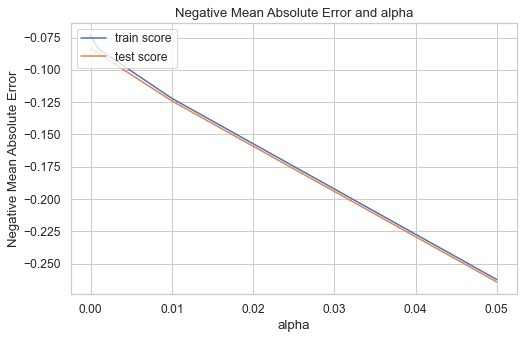

In [531]:
# Plot the mean test scores and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [532]:
#Check for the he best parameter value : alpha value
model_cv.best_params_

{'alpha': 0.0001}

In [533]:
# Hyperparamter tuning
params = {'alpha': [0.00001,0.0001, 0.001]}
lasso = Lasso()
#Perform Cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [534]:
#Displaying the Cross Validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.047048,0.002438,0.002770,0.000260,1e-05,{'alpha': 1e-05},-0.087613,-0.087660,-0.085506,-0.076774,...,-0.084913,0.004143,2,-0.072370,-0.072827,-0.071868,-0.075445,-0.072145,-0.072931,0.001295
1,0.039985,0.003366,0.002573,0.000061,0.0001,{'alpha': 0.0001},-0.084382,-0.087006,-0.085744,-0.075277,...,-0.083873,0.004404,1,-0.074649,-0.074799,-0.073826,-0.078043,-0.074264,-0.075116,0.001502
2,0.008026,0.000503,0.002506,0.000020,0.001,{'alpha': 0.001},-0.086164,-0.092201,-0.093485,-0.076928,...,-0.087587,0.005902,3,-0.083873,-0.083371,-0.082818,-0.087159,-0.083161,-0.084076,0.001579


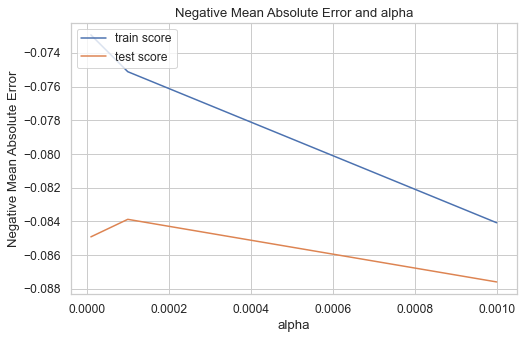

In [535]:
#Plot the mean test scores and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [536]:
# Check for the he best parameter value : alpha value
model_cv.best_estimator_

Lasso(alpha=0.0001)

###  Lasso regression  : optimal alpha value

In [537]:
# Building the Lasso regression model using the optimal alpha value
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)



In [538]:
#Display r2 score on train and test data 
print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.9280977658497441
Lasso Regression test r2: 0.7373790476938153


In [539]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_test.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [540]:
#Displaying the coefficients along with features
lasso_coef

,Feature,Coef,mod
0,LotFrontage,10.174821,10.174821
1,LotArea,0.146503,0.146503
2,OverallQual,0.484268,0.484268
3,OverallCond,0.568885,0.568885
4,ExterCond,0.115983,0.115983
5,BsmtFinSF1,-0.052072,0.052072
6,BsmtFinSF2,0.162702,0.162702
7,BsmtUnfSF,0.024108,0.024108
8,TotalBsmtSF,-0.000000,0.000000
9,CentralAir,0.492011,0.492011


In [541]:
#the top 10 variables list
lasso_coef.sort_values(by='mod',ascending=False).head(10)#Mod is absolute value of coefficients

,Feature,Coef,mod
0,LotFrontage,10.174821,10.174821
14,BsmtFullBath,0.822796,0.822796
3,OverallCond,0.568885,0.568885
9,CentralAir,0.492011,0.492011
2,OverallQual,0.484268,0.484268
73,Exterior1st_CBlock,-0.479688,0.479688
33,MSZoning_RH,0.379703,0.379703
35,MSZoning_RM,0.297522,0.297522
36,Street_Pave,0.246404,0.246404
20,GarageQual,0.240831,0.240831


In [542]:
lasso.coef_

array([ 0.14650321,  0.48426769,  0.56888466,  0.11598316, -0.05207185,
        0.16270193,  0.02410764, -0.        ,  0.49201096,  0.09436908,
        0.04004582,  0.15334986, -0.02808785,  0.82279589,  0.06879833,
        0.0614066 , -0.1168918 ,  0.08630678,  0.1830541 ,  0.24083058,
        0.23205372,  0.08027378,  0.07338682, -0.11292889, -0.05286555,
       -0.06564075, -0.02247931,  0.        , -0.04972631, -0.09866945,
       -0.01198828, -0.04956028,  0.37970294,  0.20963209,  0.29752191,
        0.24640361,  0.07410369, -0.        , -0.07649391, -0.04545706,
        0.11805891, -0.09329735,  0.06049828, -0.07443559,  0.10156389,
        0.09096545,  0.04046315,  0.        ,  0.01524911,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.00545355,  0.06060266,  0.0512744 ,  0.02520914,  0.04954772,
       -0.04885599, -0.        , -0.04137486, -0.03879962,  0.10436493,
        0.00830359,  0.16743592,  0.        , -0.        , -0.  

### Final Model : Lasso Regression 

We are finally using the Lasso regression model as it is using less numbers of variables and giving almost the same accuracy as Ridge regression model

In [543]:
# Builing the final model using Lasso regression
lasso = Lasso(alpha = 0.0001)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [544]:
#Display the r2 score 
print(r2_score(y_true = y_train,y_pred = y_train_pred))
print(r2_score(y_true = y_test,y_pred = y_test_pred))

0.9280977658497441
0.7373790476938153


### 6. Conclusion 

<p>The variables which are significant in predicting the price of a house are :
    
- LotFrontage :  If the house Linear feet of street connected to property area increase then the Sales Price increase.
    
- BsmtFullBath	: :  If the BsmtFullBath area is more the SalePrice is higher
    
- Overall Condition: If the Overall Condition is Excellent the SalePrice is higher

- CentralAir: If the CentralAir is Yes the SalePrice is higher
    
- Overall quality: If the Overall Condition is Excellent the SalePrice is higher
  
- MSZoning_RH : If the house is near residential area then the SalePrice is higher
     
- Exterior1st_CBlock : IF the house  Exterior1st is CBlock then price is less.
    
- Garage Quality: If the Garage quality is high the SalePrice is higher
    
    
These variable coefficients tells how well they describe the price of the house. This can be found in the top 10 variable list above. 
    

### Optimal value of alpha:
1. For Ridge regression :1.0
2. For Lasso Regression :0.0001

##  <font color=purple>Subjective Questions</font>

Questions will answered detailed in the PDF. Please refer to the PDF in the Github link

Question 1: Double the alpha values and evaluate model

 For Ridge regression aplha is 1.0 and now doubling it and making it 2.0

In [545]:
# Build Ridge Regression model after doubling optimal alpha value
ridge_modified = Ridge(alpha=2.0)
ridge_modified.fit(X_train, y_train)

Ridge(alpha=2.0)

In [546]:
#Create coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = housing_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']

In [547]:
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
0,LotFrontage,10.261566,10.261566
3,OverallCond,0.527282,0.527282
14,BsmtUnfSF,0.406426,0.406426
12,BsmtFinType2,0.355562,0.355562
2,OverallQual,0.338037,0.338037
11,BsmtFinSF1,0.322512,0.322512
9,BsmtExposure,0.316265,0.316265
33,GarageFinish,0.303286,0.303286
73,LotConfig_CulDSac,-0.272453,0.272453
6,ExterCond,0.264079,0.264079


In [548]:
y_train_pred = ridge_modified.predict(X_train)
y_test_pred = ridge_modified.predict(X_test)

In [549]:
print("Ridge Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Ridge Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Ridge Regression train r2: 0.9238505663513401
Ridge Regression test r2: 0.7526833276310241


the optimal value of alpha for Lasso regression is 0.0001 and doubling it to 0.0002

In [550]:
# Build Lasso Regression model using doubled value of optimal alpha value
lasso_modified = Lasso(alpha=0.0002)
lasso_modified.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [551]:
y_train_pred = lasso_modified.predict(X_train)
y_test_pred = lasso_modified.predict(X_test)

In [552]:
print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.924842196868562
Lasso Regression test r2: 0.7423837845239192


In [553]:

model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']


In [554]:
#selecting the top 10 variables
lasso_coef.sort_values(by='mod',ascending=False).head(10)

,Feature,Coef,mod
0,LotFrontage,10.174821,10.174821
14,BsmtFullBath,0.822796,0.822796
3,OverallCond,0.568885,0.568885
9,CentralAir,0.492011,0.492011
2,OverallQual,0.484268,0.484268
73,Exterior1st_CBlock,-0.479688,0.479688
33,MSZoning_RH,0.379703,0.379703
35,MSZoning_RM,0.297522,0.297522
36,Street_Pave,0.246404,0.246404
20,GarageQual,0.240831,0.240831


Q3 .After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

Dropping the first five important predictors

In [555]:
X_train_new = X_train.drop(['LotFrontage','BsmtFullBath','OverallCond','CentralAir','OverallQual'],axis=1)
X_test_new = X_test.drop(['LotFrontage','BsmtFullBath','OverallCond','CentralAir','OverallQual'],axis=1)
X_test_new.head()

,LotArea,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,Foundation_Wood,Heating_Grav,Heating_OthW,Electrical_Mix,GarageType_CarPort,SaleType_ConLI,SaleType_New,SaleType_Oth,SaleCondition_Alloca,SaleCondition_Normal
357,0.013667,0.50,0.416985,0.000000,0.114726,0.335057,0.252330,0.000000,0.0,0.174344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
512,0.036458,0.50,0.248569,0.118046,0.072346,0.245234,0.152688,0.000000,0.0,0.105498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
548,0.032415,0.75,0.085878,0.437585,0.000000,0.232633,0.138710,0.000000,0.0,0.095840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
546,0.034761,0.50,0.143130,0.000000,0.327483,0.310178,0.170968,0.348668,0.0,0.296434,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0.068078,0.75,0.167462,0.558345,0.446490,0.682391,0.637634,0.000000,0.0,0.440565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [556]:
X_train_new.shape

(988, 85)

In [557]:
X_test_new.shape

(424, 85)

In [558]:
lasso_modified = Lasso()
#Hyperparameter tuning
param = {'alpha': [0.0001, 0.001, 0.01]}
folds = 5
# Performing cross validation
lasso_cv_model_modified = GridSearchCV(estimator = lasso, 
                        param_grid = param, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv_model_modified.fit(X_train_new, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001),
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [559]:
#Results
lasso_cv_modified_results = pd.DataFrame(lasso_cv_model_modified.cv_results_)
lasso_cv_modified_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.030935,0.008400,0.003008,0.000705,0.0001,{'alpha': 0.0001},-0.100382,-0.100213,-0.091105,-0.084630,...,-0.093956,0.005929,1,-0.082321,-0.082931,-0.084152,-0.087998,-0.083965,-0.084273,0.001980
1,0.008346,0.000572,0.002799,0.000570,0.001,{'alpha': 0.001},-0.105203,-0.108352,-0.099320,-0.084046,...,-0.099127,0.008362,2,-0.093324,-0.093486,-0.095624,-0.098358,-0.094651,-0.095089,0.001836
2,0.004713,0.000092,0.002480,0.000021,0.01,{'alpha': 0.01},-0.145036,-0.147623,-0.138726,-0.121165,...,-0.137075,0.009471,3,-0.135527,-0.133150,-0.135207,-0.136931,-0.133240,-0.134811,0.001442


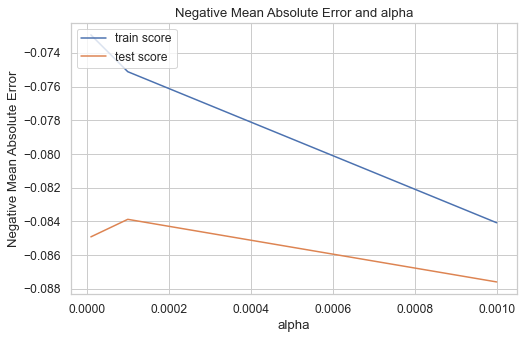

In [560]:
#Plot the mean test scores and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [561]:
#Check for the he best parameter value : alpha value
model_cv.best_params_

{'alpha': 0.0001}

In [562]:
#Optimal value after performing Gridsearch
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_new,y_train)
y_train_pred = lasso.predict(X_train_new)
y_test_pred = lasso.predict(X_test_new)

In [563]:
print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.9124746336018961
Lasso Regression test r2: 0.703294795055186


In [564]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_new.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']
# The top 5 variables
lasso_coef.sort_values(by='mod',ascending=False).head()

,Feature,Coef,mod
0,LotArea,10.205140,10.205140
10,FullBath,1.029837,1.029837
6,1stFlrSF,0.606857,0.606857
1,ExterCond,0.561906,0.561906
28,MSZoning_RH,0.512930,0.512930
